## Dataset and Problem Introduction

In this analysis, we explore the idea of handwashing by looking at two datasets from Vienna General Hospital between 1841 and 1849. The analysis examines the discovery of handwashing by Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 who worked at the Hospital.

Data Source: https://en.wikipedia.org/wiki/Historical_mortality_rates_of_puerperal_fever
<br>Reference: https://www.datacamp.com/

In [53]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into year
year = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

# Print out year
year

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## Death Numbers

The above table displays the number of women giving birth at two clinics at the Vienna General Hospital for the years 1841 to 1846. 

We can observe that at the time, giving birth was very dangerous and there was a significant number of women who died during birthing.

Text(0, 0.5, 'Proportion deaths')

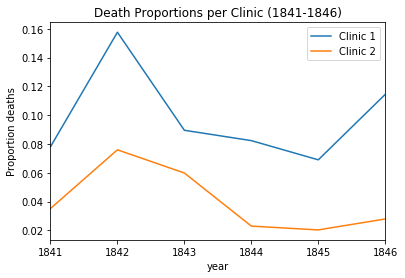

In [54]:
# Calculate proportion of deaths per no. births
year["proportion_deaths"] = year["deaths"] / year["births"]

# Extract clinic 1 data into year1 and clinic 2 data into year2
year1 = year[year["clinic"] == "clinic 1"]
year2 = year[year["clinic"] == "clinic 2"]

# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = year1.plot(x="year", y="proportion_deaths", label="Clinic 1", title = 'Death Proportions per Clinic (1841-1846)')
year2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax)
ax.set_ylabel("Proportion deaths")

In the above line chart, we notice an interesting pattern of a much higher death rate at Clinic 1 by plotting the proportion of deaths for each clinic.

Upon investigation by Dr. Semmelweis, he discovered the only difference between the operations of Clinic 1 and Clinic 2 was that medical students served at Clinic 1, while Clinic 2 was predominantly served by midwife students. This then led to the realisation that because many of the medical students who also worked in autopsy rooms examining corpses, while the midwife students only tended to women giving birth, there may have been some bacterial spreading occurring within the work of medical students. 

Dr. Semmelweis then tried to implement hand washing initiatives, which was an unusual request at the time due to little knowledge of bacteria and contamination, to see if this could reduce the mortality rates.

Text(0, 0.5, 'Proportion deaths')

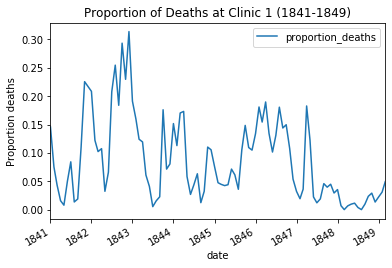

In [55]:
# Read datasets/monthly_deaths.csv into monthly
month = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per no. births
month["proportion_deaths"] = month["deaths"] / month["births"]

# Plot yearly proportion of deaths at clinic 1
ax = month.plot(x="date", y="proportion_deaths", title = 'Proportion of Deaths at Clinic 1 (1841-1849)')
ax.set_ylabel("Proportion deaths")

Observing the above chart, we can see that approximately halfway through 1847 the death rate drastically decreases.

## Result of implementing handwashing 
The above observation agrees with when mandatory handwashing became enforced at Vienna General Hospital (during the summer of 1847). 

We can further highlight the change by segmenting the line chart as follows:

Text(0, 0.5, 'Proportion deaths')

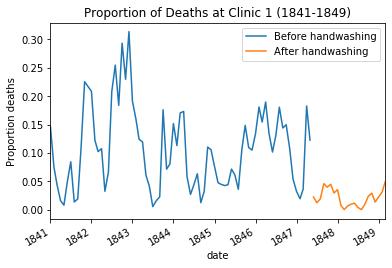

In [56]:
# Date when handwashing was made mandatory
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = month[month["date"] < handwashing_start]
after_washing = month[month["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing", title = 'Proportion of Deaths at Clinic 1 (1841-1849)')
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax)
ax.set_ylabel("Proportion deaths")

In [57]:
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()
percentage1 = "{:.2%}".format(before_proportion.mean())
percentage2 = "{:.2%}".format(after_proportion.mean())
percentage3 = "{:.2%}".format(mean_diff)
print('Average deaths BEFORE handwashing:',percentage1)
print('Average deaths AFTER handwashing:',percentage2,end='\n\n')
print('Reduction in average deaths per month:',percentage3)

Average deaths BEFORE handwashing: 10.50%
Average deaths AFTER handwashing: 2.11%

Reduction in average deaths per month: -8.40%


As per the above calculation, if we take the average number of deaths for each period before and after handwashing was introduced, we can see that average deaths decreased by 8.40%

## Observation of 95% Confidence Interval via a Bootstrap analysis

To further understand the uncertainty of how the reduction in mortalities was linked to handwashing, let's look at the 95% confidence interval via a 10,000 re-sample bootstrap analysis.

In [58]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(10000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
#confidence_interval

lower = "{:.2%}".format(confidence_interval[0.025])
upper = "{:.2%}".format(confidence_interval[0.975])
print('95% Confidence Interval: [',upper,', ',lower,']',sep='')

95% Confidence Interval: [-6.69%, -10.12%]


As per the above calculation of our 95% confidence interval, we can see that handwashing reduced the proportion of deaths by between 6.7% and 10.1%. 

Therefore, it would seem that there is solid evidence to suggest that handwashing was a simple but highly effective solution to reducing deaths at clinic 1.